## Normalized Absorption Spectra per lamda LH2

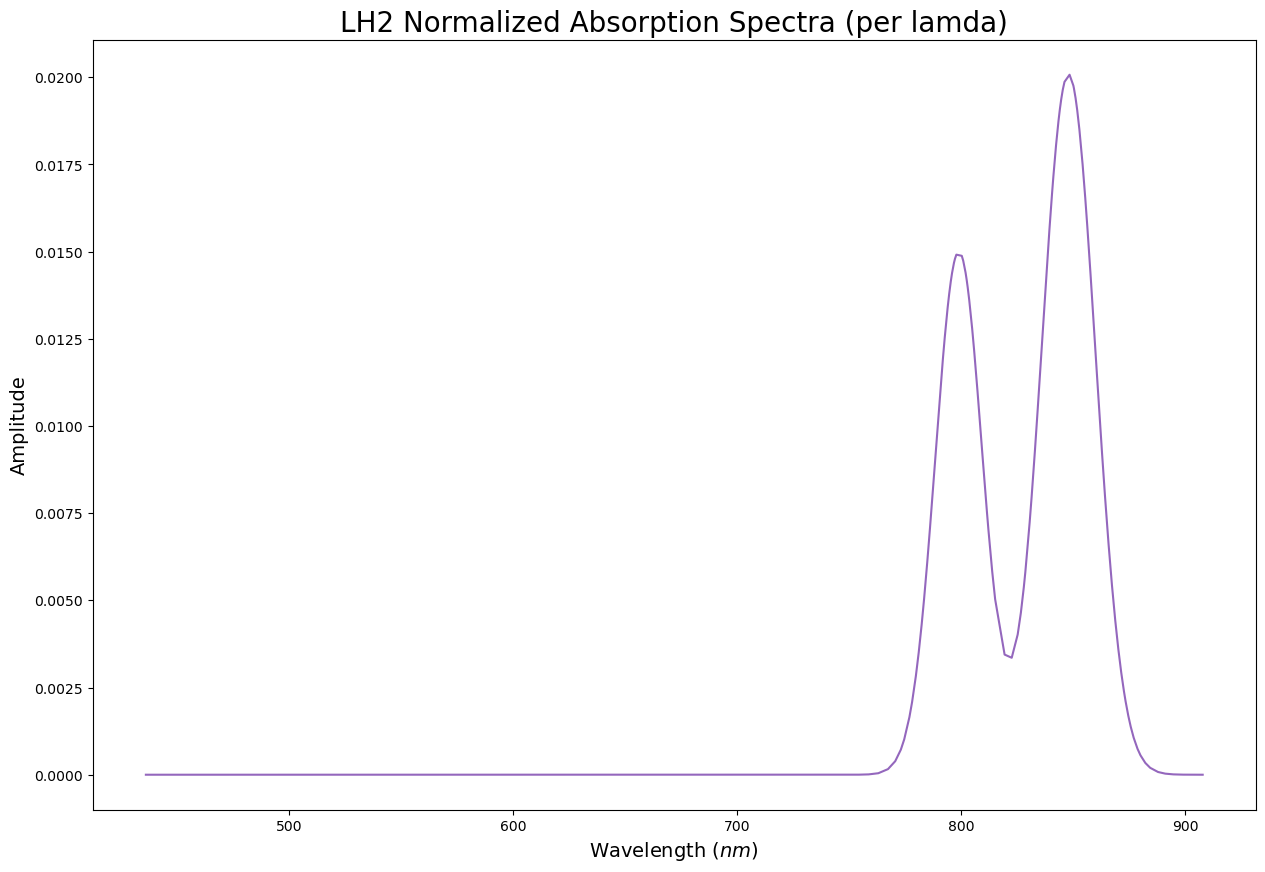

Trapezium Integration: 1.0


In [33]:
import matplotlib.pyplot as plt #import plt function from matplotlib library
import numpy as np 
from numpy import trapz
from matplotlib.ticker import (MultipleLocator, #major/minor ticks
           FormatStrFormatter, AutoMinorLocator)
import math
import pandas as pd

#Defining approximate Gaussian values
A1 = 0.45 
A2 = 0.64
mu1 = 799
mu2 = 848
sigma1 = 10.5
sigma2 = 12 

N = 26.61536761874512

res = 1 

spec_1 = []  
spec_2 = [] 
counter = 0 

fin = open('A*perlamda_LH2.txt', 'r') 
fout = open('A_Norm_perlamda_LH2.txt','w') 

for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N* (((A1/float(elements[0]))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2))))) + (A2/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))
    
    counter = counter + 1 
    
    if counter%res == 0: 
        spec_1.append(wavelength) 
        spec_2.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('LH2 Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_1,spec_2,linestyle='-',color='tab:purple')
plt.savefig('A_Norm_perlamda_LH2.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

##Integral
print('Trapezium Integration:', np.trapz(spec_2, spec_1))

fout.close() 
fin.close() 

## Interpolation

interped y value at x = 800: 0.01488267730117474
interped y value at x = 1000: -7.658978838695328e-06


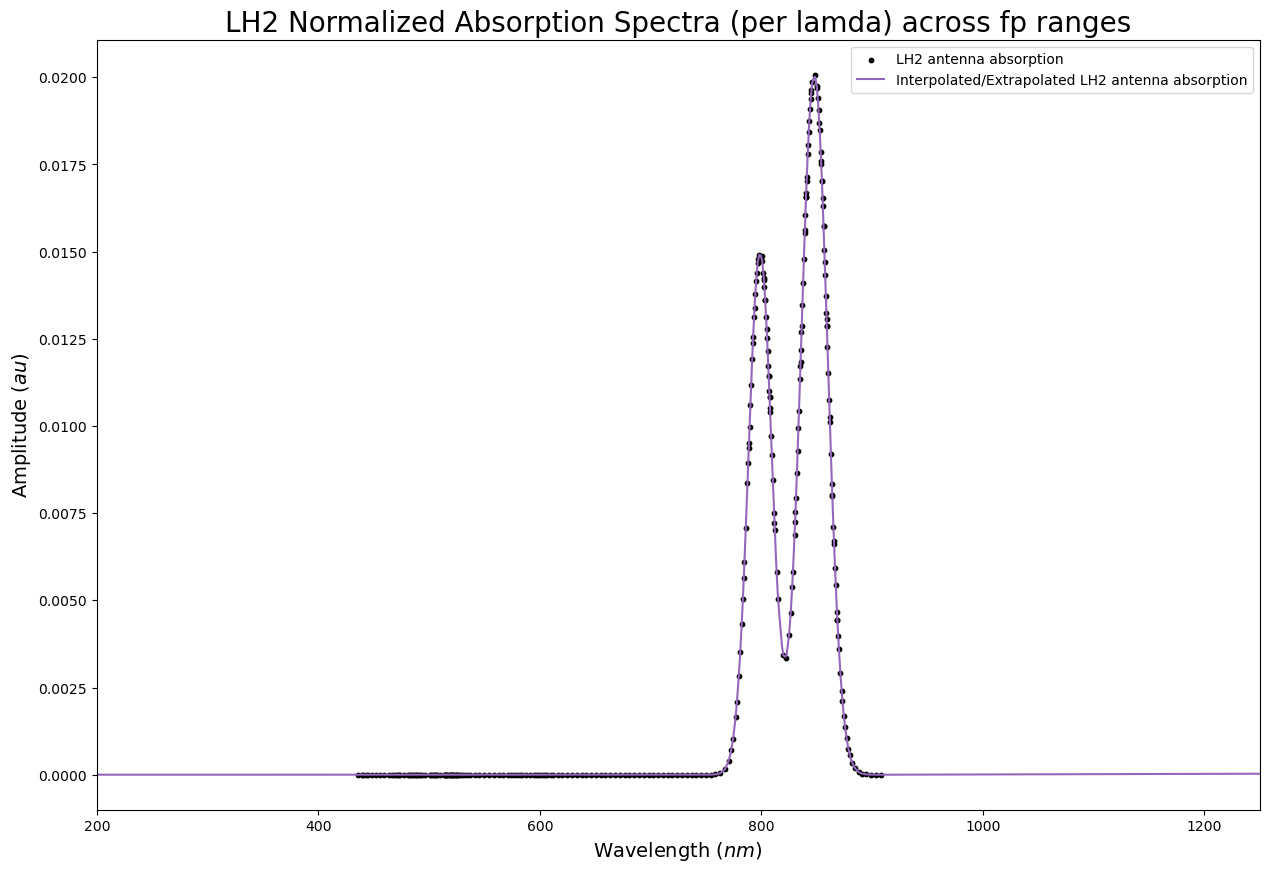

In [34]:
#Allows you to calculate y for typed-in x when that x isn't in dataset...

#Method 1

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f = interp1d(spec_1,spec_2,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x = [] #create empty array for fp_x
fp_y = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LH2_out = open('LH2_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x.append(wavelength) #add floater wavelengths to fp_x array
    fp_y.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp = fp_x #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp = abs(y_f(x_interp)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp): #for each x value in the 200-1200nm range
    LH2_out.write(str(line)+'\t'+str(abs(y_interp[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LH2_out.close()

print('interped y value at x = 800:', y_f(800))
print('interped y value at x = 1000:', y_f(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('LH2 Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_1,spec_2,color='k',label='LH2 antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp,y_interp,color='tab:purple',label='Interpolated/Extrapolated LH2 antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.25e+03)

plt.legend()
plt.savefig('LH2_interp.png') 
plt.show() 

S(850) =  0.019763505539722594


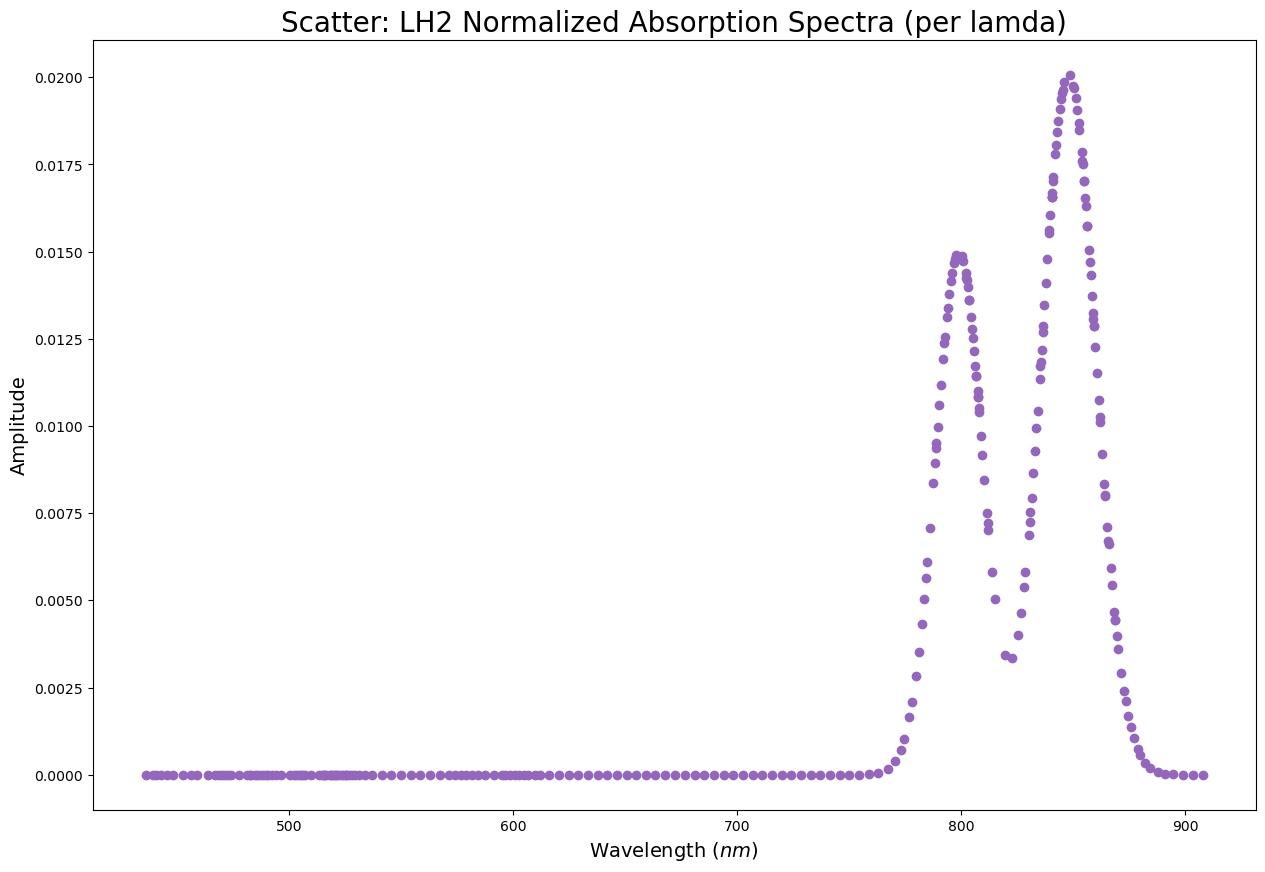

In [35]:
#Method 2: Cubic splines use a different cubic function for each set of 4 consecutive data points (interval)

from scipy.interpolate import CubicSpline

x = spec_1
y = spec_2 
cs = CubicSpline(x,y,bc_type='natural')
#Show value of interpolation at x=850nm (i.e. non-exact point in array)
print('S(850) = ', cs(850))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('Scatter: LH2 Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(x,y,color='tab:purple')
#ax.plot(x,cs,color='tab:orange')

## Curve Fitting/"Bootstrapping" to give approximate Polynomial Equation

/Users/samirchitnavis/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:658: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Users/samirchitnavis/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/samirchitnavis/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


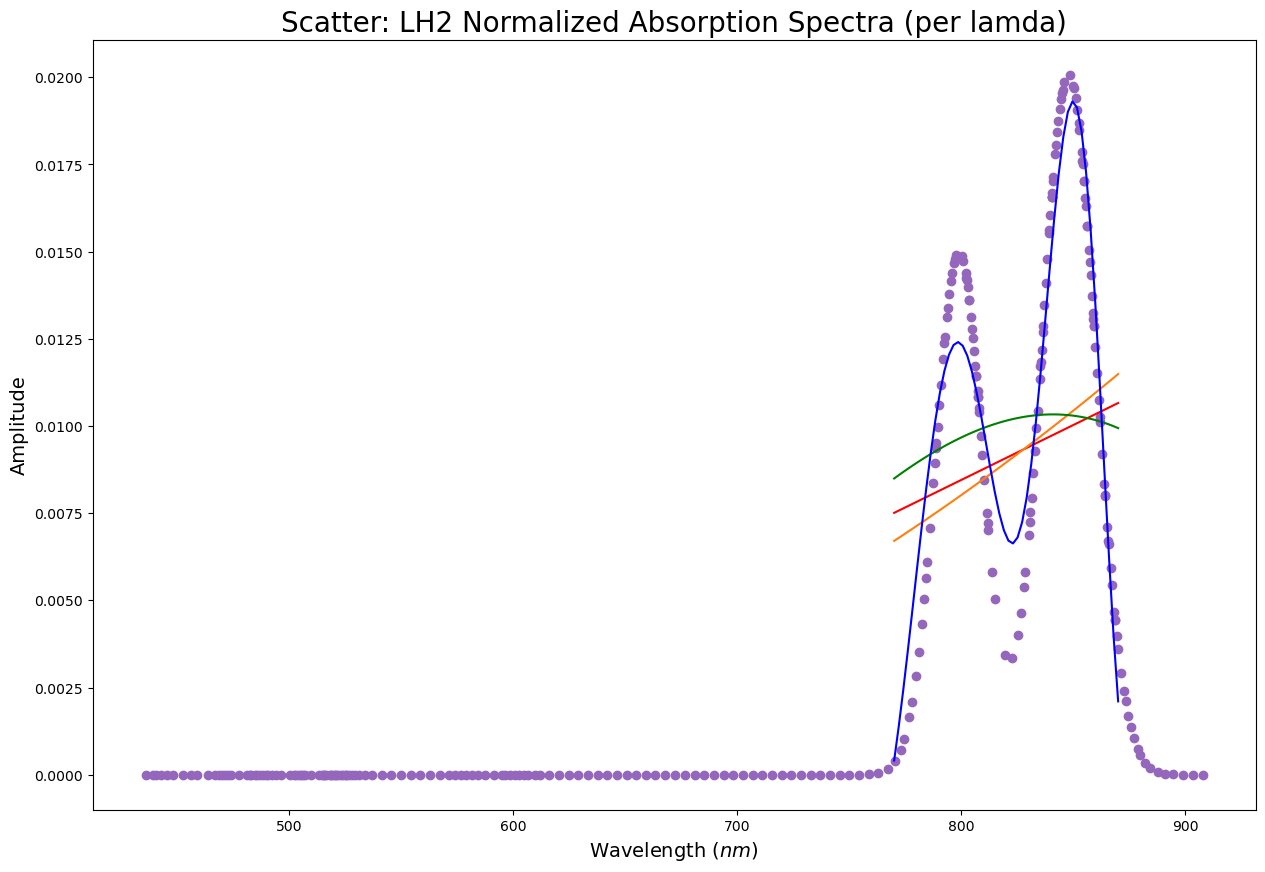

             52              51              50              49
-3.005e-145 x  + 7.194e-142 x  - 1.337e-139 x  - 4.391e-136 x 
               48              47              46              45
 - 2.034e-133 x  + 1.171e-130 x  + 2.548e-127 x  + 1.906e-124 x 
               44              43              42              41
 + 3.392e-122 x  - 9.924e-119 x  - 1.472e-115 x  - 1.111e-112 x 
               40              39          38              37
 - 3.211e-110 x  + 4.222e-107 x  + 8e-104 x  + 7.403e-101 x 
              36             35             34             33
 + 3.772e-98 x  - 6.204e-96 x  - 3.733e-92 x  - 4.553e-89 x 
              32            31            30             29
 - 3.248e-86 x  - 8.55e-84 x  + 1.36e-80 x  + 2.478e-77 x 
              28             27             26             25
 + 2.244e-74 x  + 1.046e-71 x  - 3.606e-69 x  - 1.277e-65 x 
              24             23             22             21
 - 1.366e-62 x  - 7.494e-60 x  + 1.141e-57 x  + 7.185e-54 x 


In [36]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('Scatter: LH2 Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

#fit polynomial models up to degree 5
model1 = np.poly1d(np.polyfit(spec_1,spec_2,1))
model2 = np.poly1d(np.polyfit(spec_1,spec_2,2))
model3 = np.poly1d(np.polyfit(spec_1,spec_2,3))
model60 = np.poly1d(np.polyfit(spec_1,spec_2,60))


#create scatterplot 
polyline = np.linspace(770,870)
ax.scatter(spec_1,spec_2,color='tab:purple')

#add fitted polynomial lines to scatterplot
ax.plot(polyline, model1(polyline),linestyle='-',color='r')
ax.plot(polyline, model2(polyline),linestyle='-',color='tab:orange')
ax.plot(polyline, model3(polyline),linestyle='-',color='g')
ax.plot(polyline, model60(polyline),linestyle='-',color='b')

plt.show()
print(model60)

# Normalized LH2 B800

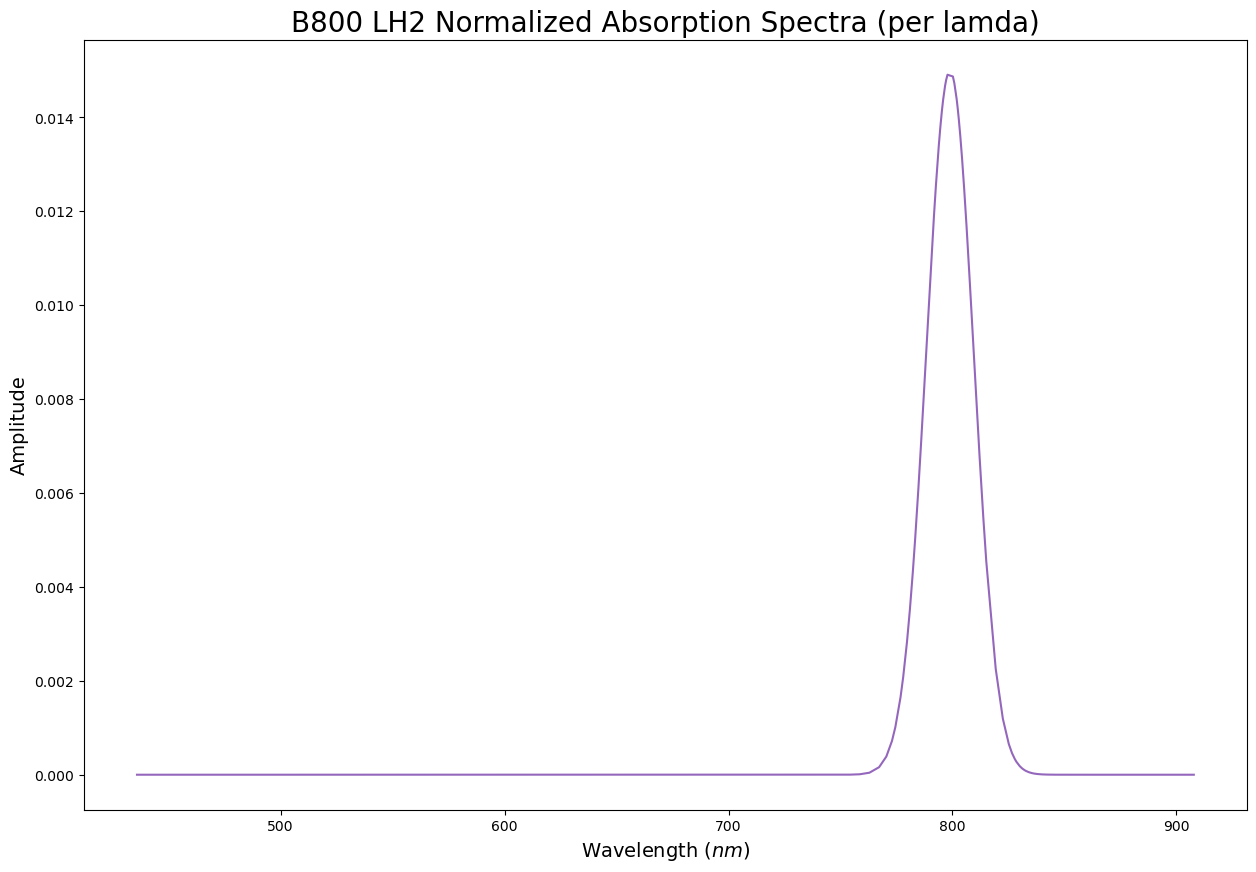

In [37]:


res = 1 

spec_A = []  
spec_B = [] 
counter = 0

fin = open('A*perlamda_LH2_B800.txt', 'r') 
fout = open('A_Norm_perlamda_LH2_B800.txt','w') 


for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*(((A1/float(elements[0]))*(math.e**((-(float(elements[0])-mu1)**2)/(2*(sigma1**2)))))) 
    
    counter = counter + 1
    
    if counter%res == 0: 
        spec_A.append(wavelength) 
        spec_B.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('B800 LH2 Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_A,spec_B,linestyle='-',color='tab:purple')
plt.savefig('A_Norm_perlamda_LH2_B800.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 800: 0.014875407495658409
interped y value at x = 1000: -9.311362827231663e-23


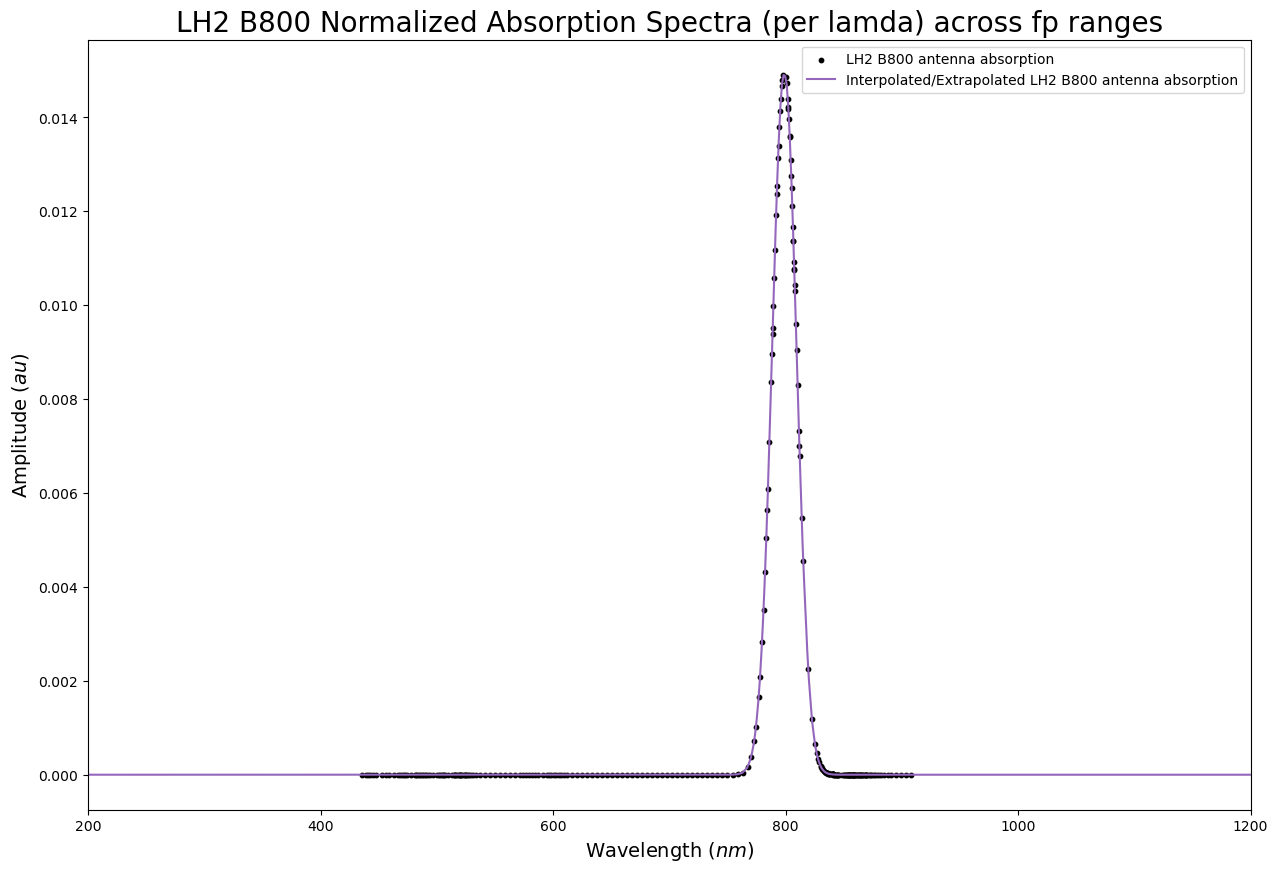

In [38]:
# Interped B800 LH2

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f_800 = interp1d(spec_A,spec_B,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x800 = [] #create empty array for fp_x
fp_y800 = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LH2_B800_out = open('LH2_B800_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x800.append(wavelength) #add floater wavelengths to fp_x array
    fp_y800.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp_800 = fp_x800 #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp_800 = abs(y_f_800(x_interp_800)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp_800): #for each x value in the 200-1200nm range
    LH2_B800_out.write(str(line)+'\t'+str(abs(y_interp_800[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LH2_B800_out.close()

print('interped y value at x = 800:', y_f_800(800))
print('interped y value at x = 1000:', y_f_800(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('LH2 B800 Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_A,spec_B,color='k',label='LH2 B800 antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp_800,y_interp_800,color='tab:purple',label='Interpolated/Extrapolated LH2 B800 antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.2e+03)

plt.legend()
plt.savefig('LH2_B800_interp.png') 
plt.show() 

# Normalized LH2 B850

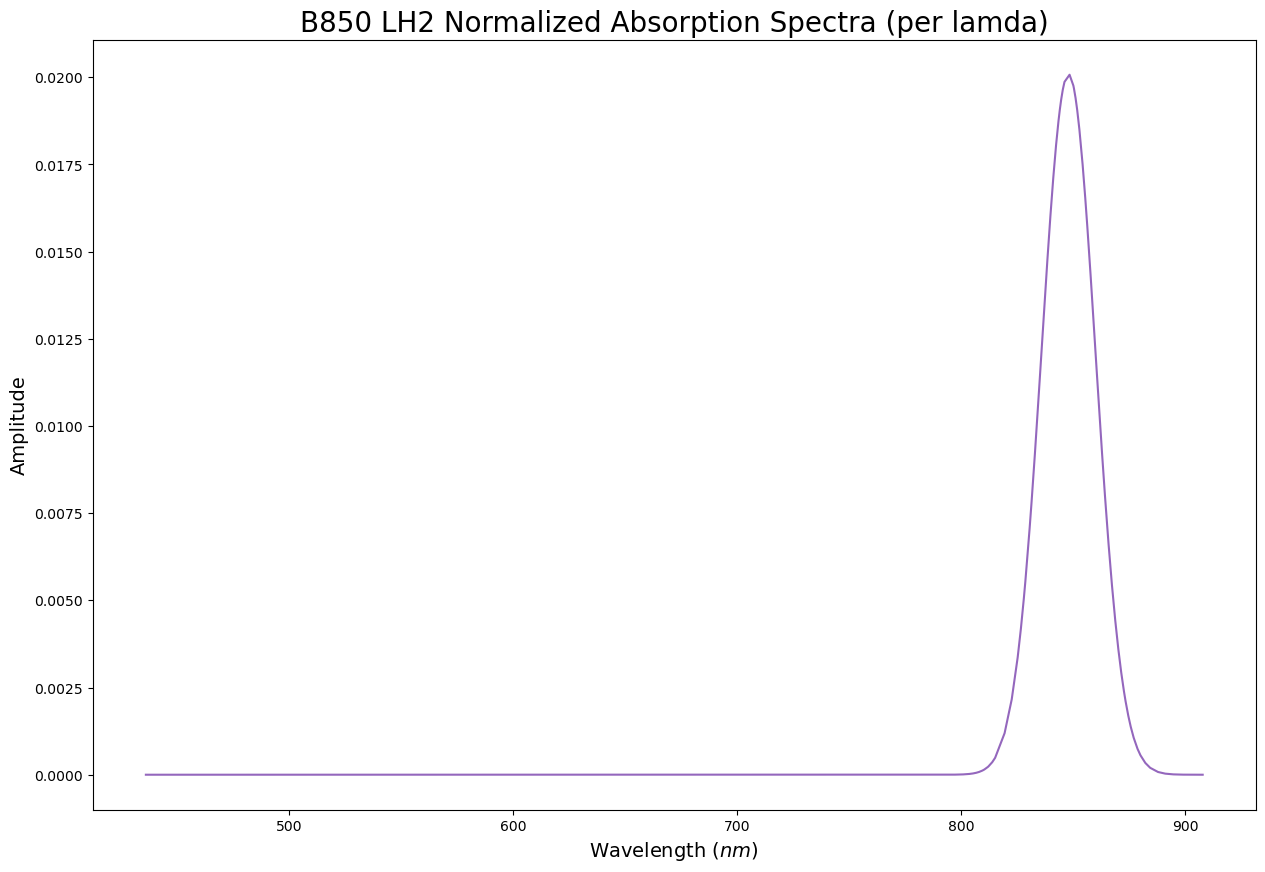

In [39]:


res = 1 

spec_C = []  
spec_D = [] 
counter = 0

fin = open('A*perlamda_LH2_B850.txt', 'r') 
fout = open('A_Norm_perlamda_LH2_B850.txt','w') 


for line in fin: 
    line = line.rstrip() 
    elements = line.split('\t') 
    
    wavelength = float(elements[0]) 
    amplitude = N*(((A2/float(elements[0]))*(math.e**((-(float(elements[0])-mu2)**2)/(2*(sigma2**2)))))) 
    
    counter = counter + 1
    
    if counter%res == 0: 
        spec_C.append(wavelength) 
        spec_D.append(amplitude) 
        fout.write(str(wavelength)+'\t'+str(amplitude)+'\n')
        
#Plotting emission spectra
fig, ax = plt.subplots(figsize=(15, 10))

ax.set_title('B850 LH2 Normalized Absorption Spectra (per lamda)', fontsize=20) 
ax.set_ylabel('Amplitude', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.plot(spec_C,spec_D,linestyle='-',color='tab:purple')
plt.savefig('A_Norm_perlamda_LH2_B850.png') ###KEY!!! ALWAYS PUT THIS BEFORE plt.show() or you get a blank pdf.
plt.show() 

fout.close() 
fin.close() 

interped y value at x = 800: 7.269805516331462e-06
interped y value at x = 1000: -7.658978838695328e-06


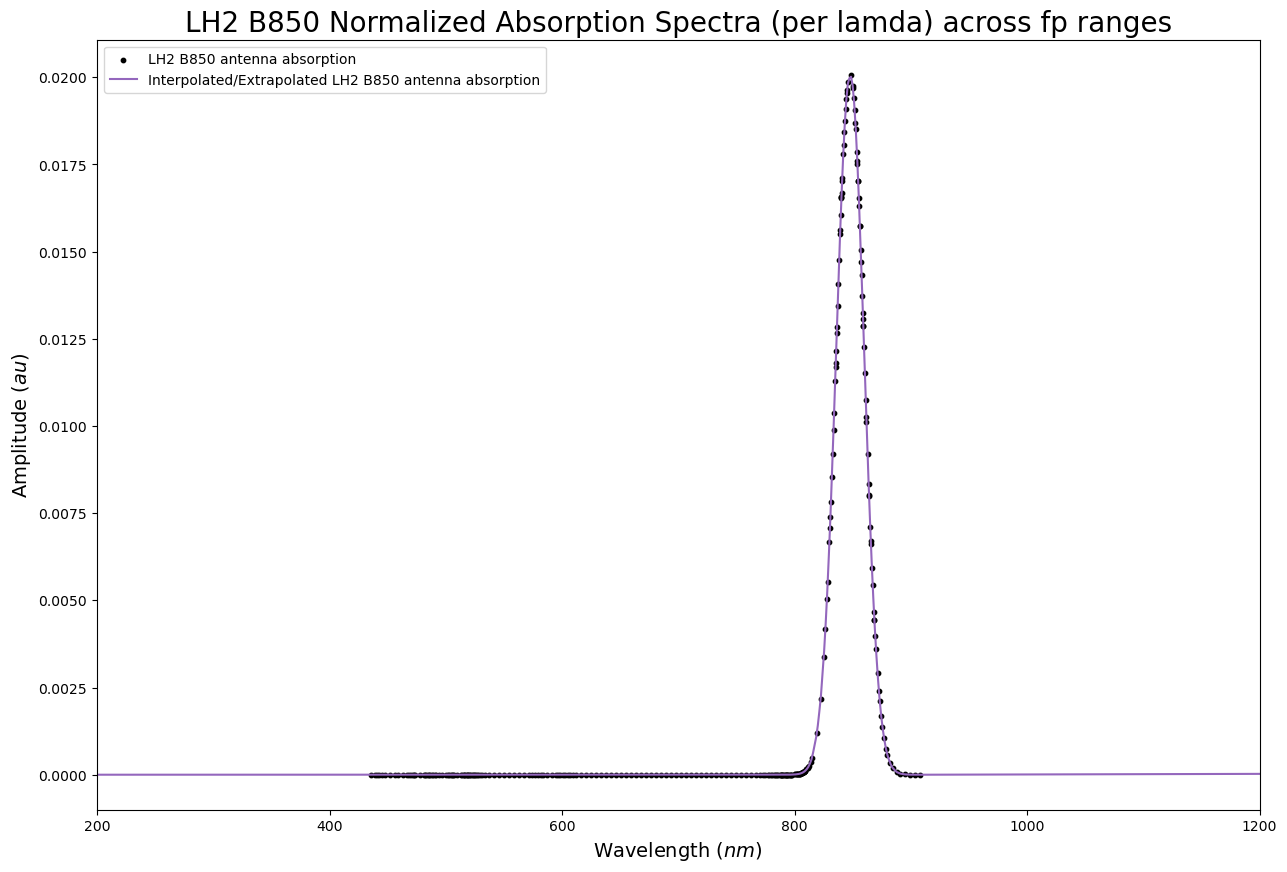

In [40]:
# Interped B850 LH2

from scipy.interpolate import interp1d #1 dimensional interpolation
 
y_f_850 = interp1d(spec_C,spec_D,fill_value='extrapolate') #interpolate (i.e. find y for x values not in dataset) and extrapolate (go beyond current range of 400-900nm absorption peaks to include 200-1200nm which is that of spectral graphs)

fp_x850 = [] #create empty array for fp_x
fp_y850 = [] #create empty array for fp_y

fp_in = open('fp_2800K.txt','r') #open fp_2800K file
LH2_B850_out = open('LH2_B850_interp.txt','w') #output file of column 1 = wavelength (extrapolated and interpolated to align with fp.txt file); column 2 = interpolated
            
for line in fp_in: #for each line in the fp_2800K dataset
    line = line.rstrip()
    elements = line.split('\t') #convert strings to stringed elements in an array separated by a tab
    
    wavelength = float(elements[0]) #convert to floats
    fp = float(elements[1]) #convert to floats
    
    fp_x850.append(wavelength) #add floater wavelengths to fp_x array
    fp_y850.append(fp) #add floater fps to fp_y array

#generate interpolated LH2 spectrum
x_interp_850 = fp_x850 #lines up the to-be-new LH2 x axis with the fp x axis (200nm-1200nm) 
y_interp_850 = abs(y_f_850(x_interp_850)) #new LH2 y axis over fp range (200nm-1200nm) 

for i, line in enumerate(x_interp_850): #for each x value in the 200-1200nm range
    LH2_B850_out.write(str(line)+'\t'+str(abs(y_interp_850[i]))+'\n') #write out y value = LH2_out, reconverting floats to strings
    
LH2_B850_out.close()

print('interped y value at x = 800:', y_f_850(800))
print('interped y value at x = 1000:', y_f_850(1000))

#plotting
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('LH2 B850 Normalized Absorption Spectra (per lamda) across fp ranges', fontsize=20) 
ax.set_ylabel('Amplitude ($au$)', fontsize=14)
ax.set_xlabel('Wavelength ($nm$)', fontsize=14) 

ax.scatter(spec_C,spec_D,color='k',label='LH2 B850 antenna absorption',s=10) #plot scattter of current LH2 absorption curve (SMALL RANGE)
ax.plot(x_interp_850,y_interp_850,color='tab:purple',label='Interpolated/Extrapolated LH2 B850 antenna absorption') #plot interped/extraped x and y for LH2 absorption across fp_2800K range (FP_2800K RANGE!)

ax.set_xlim(2.0e+02, 1.2e+03)

plt.legend()
plt.savefig('LH2_B850_interp.png') 
plt.show() 